## Hubway SQL data

### import necessary libraries

In [4]:
import sqlite3
import pandas as pd

In [5]:
conn = sqlite3.connect('hubway.db')

### Creating a dataFrame for SQL

In [6]:
query_1 = pd.read_sql_query('select * from trips limit 5', conn)
query_1

,id,duration,start_date,start_station,end_date,end_station,bike_number,sub_type,zip_code,birth_date,gender
0,1,9,2011-07-28 10:12:00,23,2011-07-28 10:12:00,23,B00468,Registered,'97217,1976.0,Male
1,2,220,2011-07-28 10:21:00,23,2011-07-28 10:25:00,23,B00554,Registered,'02215,1966.0,Male
2,3,56,2011-07-28 10:33:00,23,2011-07-28 10:34:00,23,B00456,Registered,'02108,1943.0,Male
3,4,64,2011-07-28 10:35:00,23,2011-07-28 10:36:00,23,B00554,Registered,'02116,1981.0,Female
4,5,12,2011-07-28 10:37:00,23,2011-07-28 10:37:00,23,B00554,Registered,'97214,1983.0,Female


In [7]:
query_1.columns

Index(['id', 'duration', 'start_date', 'start_station', 'end_date',
       'end_station', 'bike_number', 'sub_type', 'zip_code', 'birth_date',
       'gender'],
      dtype='object')

### a function that takes our query as an input and shows the result as a formatted dataframe

In [8]:
def run_query(query):
    return pd.read_sql_query(query,conn)

In [9]:
query = '''
select * from trips ;
'''
run_query(query)

,id,duration,start_date,start_station,end_date,end_station,bike_number,sub_type,zip_code,birth_date,gender
0,1,9,2011-07-28 10:12:00,23,2011-07-28 10:12:00,23,B00468,Registered,'97217,1976,Male
1,2,220,2011-07-28 10:21:00,23,2011-07-28 10:25:00,23,B00554,Registered,'02215,1966,Male
2,3,56,2011-07-28 10:33:00,23,2011-07-28 10:34:00,23,B00456,Registered,'02108,1943,Male
3,4,64,2011-07-28 10:35:00,23,2011-07-28 10:36:00,23,B00554,Registered,'02116,1981,Female
4,5,12,2011-07-28 10:37:00,23,2011-07-28 10:37:00,23,B00554,Registered,'97214,1983,Female
...,...,...,...,...,...,...,...,...,...,...,...
1569996,1579021,720,2013-11-30 23:30:00,130,2013-11-30 23:42:00,90,T01341,Registered,'02141,,Male
1569997,1579022,480,2013-11-30 23:32:00,67,2013-11-30 23:40:00,88,T01328,Registered,'02143,,Male
1569998,1579023,540,2013-11-30 23:32:00,137,2013-11-30 23:41:00,133,T01310,Casual,,,
1569999,1579024,120,2013-11-30 23:36:00,76,2013-11-30 23:38:00,68,B01478,Registered,'02141,,Male


### TO list down all the tables in tha database

In [10]:
query = 'SELECT name from sqlite_master where type= "table"'
run_query(query)

,name
0,trips
1,stations


### 1.What was the duration of the longest trip?

In [11]:
query = 'select max(duration) as longest_trip from trips'
run_query(query)

,longest_trip
0,9999


### 2. How many trips were taken by 'registered' users?

In [12]:
query = '''
select count(*) as "Total registered users"
from trips 
where sub_type = "Registered" ;
'''
run_query(query)

,Total registered users
0,1105192


### 3. What was the average trip duration?

In [13]:
query = '''
select avg(duration) as 'Average Duration'
from trips ;
'''
run_query(query)

,Average Duration
0,912.409682


### 4. Do registered or casual users take longer trips?

In [51]:
query = '''
select avg(duration) as 'Average Duration',
sub_type
from trips
group by sub_type ;
'''
run_query(query)

,Average Duration,sub_type
0,1519.643897,Casual
1,657.026067,Registered


In [54]:
y = pd.DataFrame(run_query(query))
y

,Average Duration,sub_type
0,1519.643897,Casual
1,657.026067,Registered


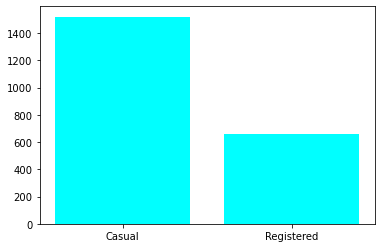

In [56]:
plt.bar(y.sub_type, y['Average Duration'], color='cyan')
plt.show()

#### On average Casual riders take ride for around 25 min, whereas the registered users ride around 11 min

### 5. Which bike was used for the most trips?

In [15]:
query = '''
select count(bike_number) as bike,
bike_number
from trips
group by bike_number 
order by bike
desc
limit 1; 
'''
run_query(query)

,bike,bike_number
0,2120,B00490


### 6. What is the average duration of trips by users over the age of 30?

In [16]:
query = '''
select avg(duration) as 'Average Duration'
from trips
where (2021 - birth_date > 30) ;
'''
run_query(query)

,Average Duration
0,915.167566


## Now checking-out another table in our database

In [17]:
query = '''
select * from stations limit 5;
'''
run_query(query)

,id,station,municipality,lat,lng
0,3,Colleges of the Fenway,Boston,42.340021,-71.100812
1,4,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616
2,5,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179
3,6,Cambridge St. at Joy St.,Boston,42.361284999999995,-71.06514
4,7,Fan Pier,Boston,42.353412,-71.044624


### 1. which station has been visited the most?

In [23]:
query = '''
select count(station) as frequency,
station
from stations
group by station
order by frequency desc
limit 5 ;
'''
run_query(query)

,frequency,station
0,2,Mayor Thomas M. Menino - Government Center
1,2,Dudley Square
2,2,Charles Circle - Charles St. at Cambridge St.
3,2,Boylston at Fairfield
4,2,Andrew Station - Dorchester Ave at Humboldt Pl


### 2. which are the different municipalities?

In [27]:
query = '''
select distinct(municipality)
from stations 
order by municipality ;
'''
run_query(query)

,municipality
0,Boston
1,Brookline
2,Cambridge
3,Somerville


### which municipality has most no of stations ?

In [40]:
query = '''
select count(municipality) as frequency,
municipality
from stations
group by municipality 
order by frequency desc
;
'''
run_query(query)

,frequency,municipality
0,97,Boston
1,28,Cambridge
2,12,Somerville
3,5,Brookline


In [46]:
x = pd.DataFrame(run_query(query))
x.columns

Index(['frequency', 'municipality'], dtype='object')

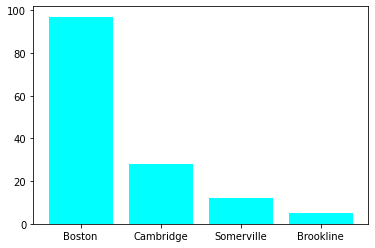

In [49]:
import matplotlib.pyplot as plt 
plt.bar(x.municipality, x.frequency, color='cyan')
plt.show()